# Get Multi-Variate Time Series Data

In [ ]:
#!wget https://s3-us-west-2.amazonaws.com/telemanom/data.zip

In [ ]:
#!unzip -qq data.zip

In [ ]:
#!ls data

In [ ]:
#!ls data/train

In [ ]:
#!ls data/test

In [ ]:
!git clone https://github.com/ML4ITS/mtad-gat-pytorch.git

fatal: destination path 'mtad-gat-pytorch' already exists and is not an empty directory.


In [ ]:
!ls mtad-gat-pytorch/datasets/data

labeled_anomalies.csv  msl_train_md.csv  smap_train_md.csv


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import yfinance as yf

import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, Dataset, SubsetRandomSampler, SequentialSampler
import torch.nn as nn
from tqdm.notebook import tqdm
import seaborn as sns


In [ ]:
#smap_channels = pd.read_csv('mtad-gat-pytorch/datasets/data/smap_train_md.csv')
#print("Number of Channels : ",len(smap_channels))
#smap_channels.head(5)

In [ ]:
#smap_channels = list(smap_channels['chan_id'].values)
#len(smap_channels)

# Create SMAP Data from Time Series across all the Channel IDs - Each Time Step has 25 features

In [ ]:
smap_data =[]

#1. Gold
#gold = yf.Ticker("GC=F")

#2. Copper
#copp = yf.Ticker("HG=F")

#3. Tsla
#tsla = yf.Ticker("TSLA")

#4. Sunpower
#enph = yf.Ticker("ENPH")

#5. Inflation
#tip = yf.Ticker("TIP")

#6. Federal Fund Rate
#fdr = fed_funds_rate

#7. Nasdaq
#qqq = yf.Ticker("QQQ")

#8. 2 Year Bond
#t2y = yf.Ticker("ZT=F")


#10. Silver (label)
#silv = yf.Ticker("SI=F")


df = pd.DataFrame()

#구리/CPI/10년물 채권

tickers = ['GC=F','HG=F', 'TSLA', 'ENPH', 'TIP','QQQ','ZT=F','ZN=F','CL=F','SI=F']

# Download data for the tickers
df = yf.download(tickers, start='2013-01-01', end='2023-05-30')

# Print the data for the first 5 rows of each ticker
print(df.head())

#for smap_channel in smap_channels:
#  tmp_data = np.load(os.path.join('data/train/',smap_channel+'.npy'))
#  smap_data.extend(tmp_data)
  #print(smap_data.shape)
#smap_data = np.array(df.value)
#smap_data = np.array(smap_data)
#print("Shape of SMAP Data : ", smap_data.shape)

[*********************100%***********************]  10 of 10 completed
            Adj Close                                                   \
                 CL=F  ENPH         GC=F    HG=F        QQQ       SI=F   
Date                                                                     
2013-01-02  93.120003  3.79  1687.900024  3.7245  61.228268  30.952000   
2013-01-03  92.919998  3.73  1673.699951  3.7015  60.909382  30.671000   
2013-01-04  93.089996  3.90  1648.099976  3.6785  60.708908  29.896000   
2013-01-07  93.190002  3.75  1645.500000  3.6630  60.727146  30.032000   
2013-01-08  93.150002  3.71  1661.500000  3.6570  60.608700  30.415001   

                                                         ...    Volume  \
                  TIP      TSLA        ZN=F        ZT=F  ...      CL=F   
Date                                                     ...             
2013-01-02  95.703865  2.357333  132.140625  110.218750  ...  203865.0   
2013-01-03  95.049271  2.318000  131.625

In [ ]:
df.values

array([[9.31200027e+01, 3.78999996e+00, 1.68790002e+03, ...,
        1.79220000e+07, 7.51382000e+05, 1.47601000e+05],
       [9.29199982e+01, 3.73000002e+00, 1.67369995e+03, ...,
        1.11300000e+07, 1.19225600e+06, 1.54443000e+05],
       [9.30899963e+01, 3.90000010e+00, 1.64809998e+03, ...,
        1.01100000e+07, 1.54914000e+06, 3.22812000e+05],
       ...,
       [7.43399963e+01, 1.64050003e+02, 1.96280005e+03, ...,
        1.37605100e+08, 4.35317700e+06, 2.06947400e+06],
       [7.18300018e+01, 1.64589996e+02, 1.94309998e+03, ...,
        9.68707000e+07, 3.71166000e+06, 1.58678700e+06],
       [7.26699982e+01, 1.65199997e+02, 1.94409998e+03, ...,
        1.62061500e+08, 2.06796400e+06, 8.78869000e+05]])

In [ ]:
y1=df.Close['SI=F']
y2=df.Close['SI=F'].shift(-5)

y=[0]*len(y1)
y=np.zeros(len(y1))

#int_list = [int(i) for i in str_list]
y = [int(i) for i in y]

y=pd.DataFrame(y)
#print(y)
for i in range(len(y)):
  if y1[i]*1.05<y2[i]:
    y[0][i]=1
  elif y1[i]*0.95>y2[i]:
    y[0][i]=-1
print(y)

      0
0     0
1     0
2     0
3     0
4     0
...  ..
2617  0
2618  0
2619  0
2620  0
2621  0

[2622 rows x 1 columns]


In [ ]:
#input_data = np.concatenate((df.Close.values,y),axis=1)
#smap_data = np.array(input_data)
#smap_data = np.array(smap_data)
smap_data = df.Close.values
print("Shape of SMAP Data : ", smap_data.shape)

Shape of SMAP Data :  (2622, 10)


In [ ]:
np.sum(np.isnan(smap_data),axis=0)

array([2, 3, 4, 3, 3, 6, 3, 3, 4, 2])

In [ ]:
smap_data=smap_data[~np.isnan(smap_data).any(axis=1)]

In [ ]:
smap_data.shape

(2614, 10)

In [ ]:
# Next the Data is scaled using Min-Max Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [ ]:
def normalize_data(data, scaler=None):
  data = np.asarray(data, dtype=np.float32)
  if np.any(sum(np.isnan(data))):
    data = np.nan_to_num(data)

  if scaler is None:
    scaler=MinMaxScaler()
    scaler.fit(data)
  data=scaler.transform(data)
  print("Data normalized")

  return data, scaler

In [ ]:
smap_data_norm, scaler = normalize_data(smap_data)

Data normalized


In [ ]:
#smap_data_pt = torch.from_numpy(smap_data)
smap_data_pt = torch.from_numpy(smap_data_norm)
smap_data_pt.size()

torch.Size([2614, 10])

# Create Sliding Window Dataset - Breaking down the entire time series into small temporal segments which will be used to train the model.

In [ ]:
class SlidingWindowDataset(Dataset):
  def __init__(self, data, window, target_dim=None, horizon=1):
    self.data= data
    self.window = window
    self.target_dim = target_dim
    self.horizon = horizon

  def __getitem__(self,index):
    x = self.data[index : index+self.window]
    y = self.data[index + self.window : index + self.window + self.horizon]
    return x,y

  def __len__(self):
    return len(self.data) - self.window

In [ ]:
Window=60
BatchSZ=64
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
smap_x_y = SlidingWindowDataset(smap_data_pt, 60)

In [ ]:
smap_x_y

In [ ]:
def create_data_loaders(train_dataset, batch_size, val_split=0.1, shuffle=False, test_dataset=None):
    train_loader, val_loader, test_loader = None, None, None
    #if we set ratio 0
    if val_split == 0.0:
        print(f"train_size: {len(train_dataset)}")
        train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)

    else:
        dataset_size = len(train_dataset)
        indices = list(range(dataset_size))
        split = int(np.floor(val_split * dataset_size))
        if shuffle:
            np.random.shuffle(indices)
        train_indices, val_indices ,test_indices= indices[:dataset_size-split*2], indices[dataset_size-split*2:dataset_size-split], indices[dataset_size-split:]

        #train_sampler = SubsetRandomSampler(train_indices)
        #valid_sampler = SubsetRandomSampler(val_indices)
        train_sampler = SequentialSampler(train_indices)
        valid_sampler = SequentialSampler(val_indices)
        test_sampler = SequentialSampler(test_indices)

        # in torch DataLoader we need to set batch_size but, I'm not sure to set
        train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler)
        val_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, sampler=valid_sampler)
        test_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, sampler=test_sampler)

        print(f"train_size: {len(train_indices)}")
        print(f"validation_size: {len(val_indices)}")
        print(f"test_size: {len(test_indices)}")
    #if test_dataset is not None:
        #test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
        #print(f"test_size: {len(test_dataset)}")
    #if test_dataset is None then we return None?
    return train_loader, val_loader, test_loader

In [ ]:
train_dl, val_dl, test_dl = create_data_loaders(smap_x_y, BatchSZ)

train_size: 2044
validation_size: 255
test_size: 255


- Until now, smap_x_y : is
1. slided
2. torched from numpy
3. extended data -> np.array()

In [ ]:
val_dl

> We determine the shape of batch
> - X : 256 batch size, 60 window length, 10#Features

> - Y : 256 bathc size, 1 future value, 10#Features.

In [ ]:
eg = next(iter(val_dl))
eg[0].size(), eg[1].size()

(torch.Size([64, 60, 10]), torch.Size([64, 1, 10]))

In [ ]:
import sys
sys.path.insert(0,'mtad-gat-pytorch/')

In [ ]:
from modules import (
    ConvLayer,
    FeatureAttentionLayer,
    TemporalAttentionLayer,
    GRULayer,
    Forecasting_Model,
    ReconstructionModel,
)

In [ ]:
class MTAD_GAT(nn.Module):

    def __init__(
        self,
        n_features,
        window_size,
        out_dim,
        kernel_size=7,
        feat_gat_embed_dim=None,
        time_gat_embed_dim=None,
        use_gatv2=False,
        gru_n_layers=1,
        gru_hid_dim=150,
        forecast_n_layers=1,
        forecast_hid_dim=150,
        recon_n_layers=1,
        recon_hid_dim=150,
        dropout=0.2,
        alpha=0.2
    ):
        super(MTAD_GAT, self).__init__()

        self.conv = ConvLayer(n_features, kernel_size)
        self.feature_gat = FeatureAttentionLayer(n_features, window_size, dropout, alpha, feat_gat_embed_dim, use_gatv2, use_bias = False)
        self.temporal_gat = TemporalAttentionLayer(n_features, window_size, dropout, alpha, time_gat_embed_dim, use_gatv2, use_bias = False)
        self.gru = GRULayer(3 * n_features, gru_hid_dim, gru_n_layers, dropout)
        self.forecasting_model = Forecasting_Model(gru_hid_dim, forecast_hid_dim, out_dim, forecast_n_layers, dropout)
        self.recon_model = ReconstructionModel(window_size, gru_hid_dim, recon_hid_dim, out_dim, recon_n_layers, dropout)

    def forward(self, x):
        # x shape (b, n, k): b - batch size, n - window size, k - number of features

        x = self.conv(x)
        h_feat = self.feature_gat(x)
        h_temp = self.temporal_gat(x)

        h_cat = torch.cat([x, h_feat, h_temp], dim=2)  # (b, n, 3k)

        _, h_end = self.gru(h_cat)
        h_end = h_end.view(x.shape[0], -1)   # Hidden state for last timestamp

        predictions = self.forecasting_model(h_end)
        recons = self.recon_model(h_end)

        return predictions, recons

In [ ]:
#model = MTAD_GAT(n_features = 10, window_size = Window, out_dim = 10, feat_gat_embed_dim = 256, time_gat_embed_dim = 64)
model = MTAD_GAT(n_features = 10, window_size = Window, out_dim = 10, feat_gat_embed_dim = 10, time_gat_embed_dim = 60)

In [ ]:
model.to(device)

MTAD_GAT(
  (conv): ConvLayer(
    (padding): ConstantPad1d(padding=(3, 3), value=0.0)
    (conv): Conv1d(10, 10, kernel_size=(7,), stride=(1,))
    (relu): ReLU()
  )
  (feature_gat): FeatureAttentionLayer(
    (lin): Linear(in_features=60, out_features=10, bias=True)
    (leakyrelu): LeakyReLU(negative_slope=0.2)
    (sigmoid): Sigmoid()
  )
  (temporal_gat): TemporalAttentionLayer(
    (lin): Linear(in_features=10, out_features=60, bias=True)
    (leakyrelu): LeakyReLU(negative_slope=0.2)
    (sigmoid): Sigmoid()
  )
  (gru): GRULayer(
    (gru): GRU(30, 150, batch_first=True)
  )
  (forecasting_model): Forecasting_Model(
    (layers): ModuleList(
      (0): Linear(in_features=150, out_features=150, bias=True)
      (1): Linear(in_features=150, out_features=10, bias=True)
    )
    (dropout): Dropout(p=0.2, inplace=False)
    (relu): ReLU()
  )
  (recon_model): ReconstructionModel(
    (decoder): RNNDecoder(
      (rnn): GRU(150, 150, batch_first=True)
    )
    (fc): Linear(in_feat

In [ ]:
eg_out = model(eg[0].float().to(device))
# First Entity : Future Time Step Forecasted
# Second Entity : Reconstructed original input
eg_out[0].size(), eg_out[1].size()

(torch.Size([64, 10]), torch.Size([64, 60, 10]))

In [ ]:
# Optimizer : Adam lr = 0.001 we use the MSE maybe
# Both Forecasting and Reconstruction would use MSE Loss function
EPOCHS = 10
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
forecast_criterion = nn.MSELoss()
recon_criterion = nn.MSELoss()

In [ ]:
len(train_dl), len(val_dl)

(32, 4)

# Training Loop, Final Loss = Forecasting Loss + Reconstruction Loss, Track Loss on Eval set

In [ ]:
!mkdir model_checkpoints

mkdir: cannot create directory ‘model_checkpoints’: File exists


In [ ]:
Best_Valid_loss = 999999
Best_Epoch=-1

for epoch in range(EPOCHS):
  model.train()
  forecast_b_losses = []
  recon_b_losses = []

  print("Epoch : ",epoch)
  print("Training Started ... ")

  for batch_idx, batch in enumerate(train_dl):
    x = batch[0].to(device).float()
    y = batch[1].to(device).float()
    optimizer.zero_grad()

    preds, recons = model(x)

    forecast_loss = torch.sqrt(forecast_criterion(y.squeeze(1),preds))
    recon_loss = torch.sqrt(recon_criterion(x, recons))

    loss = forecast_loss + recon_loss
    #loss = forecast_loss + 0
    loss.backward()
    optimizer.step()

    forecast_b_losses.append(forecast_loss.item())
    recon_b_losses.append(recon_loss.item())

  forecast_b_losses = np.array(forecast_b_losses)
  recon_b_losses = np.array(recon_b_losses)

  forecast_epoch_loss = np.sqrt((forecast_b_losses ** 2).mean())
  recon_epoch_loss = np.sqrt((recon_b_losses**2).mean())
  total_epoch_loss = forecast_epoch_loss + recon_epoch_loss

  print('Forecasting Loss : ', forecast_epoch_loss)
  print('Reconstruction Loss : ', recon_epoch_loss)

  forecast_b_losses_eval = []
  recon_b_losses_eval = []

  print("Validation Started ... ")

  model.eval()
  with torch.no_grad():
    for batch_idx, batch in enumerate(val_dl):
      x = batch[0].to(device).float()
      y = batch[1].to(device).float()

      preds , recons = model(x)

      forecast_loss = torch.sqrt(forecast_criterion(y.squeeze(1)[9], preds[9]))
      recon_loss = torch.sqrt(recon_criterion(x[:,9],recons[:,9]))
      loss = forecast_loss + recon_loss

      forecast_b_losses_eval.append(forecast_loss.item())
      recon_b_losses_eval.append(recon_loss.item())

  forecast_b_losses_eval = np.array(forecast_b_losses_eval)
  recon_b_losses_eval = np.array(recon_b_losses_eval)

  forecast_epoch_loss_eval = np.sqrt((forecast_b_losses_eval**2).mean())
  recon_epoch_loss_eval = np.sqrt((recon_b_losses_eval**2).mean())

  total_epoch_loss_eval = forecast_epoch_loss_eval + recon_epoch_loss_eval

  print('Forecasting Loss : ', forecast_epoch_loss_eval)
  print('Reconstruction Loss : ', recon_epoch_loss_eval)

  if total_epoch_loss_eval < Best_Valid_loss:
    Best_Valid_loss = total_epoch_loss_eval
    Best_Epoch = epoch

    ckpt = {
        'Epoch' : epoch,
        'Model' : model.state_dict(),
        'Optimizer' : optimizer.state_dict(),
        'Train_Forecast_loss' : forecast_epoch_loss,
        'Train_Recon_loss' : recon_epoch_loss,
        'Eval_Forecast_loss' : forecast_epoch_loss_eval,
        'Eval_Recon' : recon_epoch_loss_eval
    }

    torch.save(ckpt, os.path.join('model_checkpoints', str(epoch) + '.pt'))







Epoch :  0
Training Started ... 
Forecasting Loss :  0.13445343873511373
Reconstruction Loss :  0.1905959487636421
Validation Started ... 
Forecasting Loss :  0.3459967464465696
Reconstruction Loss :  0.2438303223544992
Epoch :  1
Training Started ... 
Forecasting Loss :  0.1962206067807059
Reconstruction Loss :  0.14262815752553926
Validation Started ... 
Forecasting Loss :  0.17038916155968195
Reconstruction Loss :  0.23859863924179375
Epoch :  2
Training Started ... 
Forecasting Loss :  0.14962732006840113
Reconstruction Loss :  0.1477910493854914
Validation Started ... 
Forecasting Loss :  0.3305862547332223
Reconstruction Loss :  0.24285462728218798
Epoch :  3
Training Started ... 
Forecasting Loss :  0.19711037247620936
Reconstruction Loss :  0.14470467271674015
Validation Started ... 
Forecasting Loss :  0.18078026633221206
Reconstruction Loss :  0.234593667379859
Epoch :  4
Training Started ... 
Forecasting Loss :  0.14296819242408035
Reconstruction Loss :  0.13839999701425507


In [ ]:
#best_model = MTAD_GAT(n_features = 10, window_size=Window, out_dim=10, feat_gat_embed_dim = 256, time_gat_embed_dim = 64)
best_model = MTAD_GAT(n_features = 10, window_size=Window, out_dim=10, feat_gat_embed_dim = 10, time_gat_embed_dim = 60)
best_model.load_state_dict(torch.load(os.path.join('model_checkpoints', str(Best_Epoch)+'.pt'))['Model'])
best_model.to(device)




MTAD_GAT(
  (conv): ConvLayer(
    (padding): ConstantPad1d(padding=(3, 3), value=0.0)
    (conv): Conv1d(10, 10, kernel_size=(7,), stride=(1,))
    (relu): ReLU()
  )
  (feature_gat): FeatureAttentionLayer(
    (lin): Linear(in_features=60, out_features=10, bias=True)
    (leakyrelu): LeakyReLU(negative_slope=0.2)
    (sigmoid): Sigmoid()
  )
  (temporal_gat): TemporalAttentionLayer(
    (lin): Linear(in_features=10, out_features=60, bias=True)
    (leakyrelu): LeakyReLU(negative_slope=0.2)
    (sigmoid): Sigmoid()
  )
  (gru): GRULayer(
    (gru): GRU(30, 150, batch_first=True)
  )
  (forecasting_model): Forecasting_Model(
    (layers): ModuleList(
      (0): Linear(in_features=150, out_features=150, bias=True)
      (1): Linear(in_features=150, out_features=10, bias=True)
    )
    (dropout): Dropout(p=0.2, inplace=False)
    (relu): ReLU()
  )
  (recon_model): ReconstructionModel(
    (decoder): RNNDecoder(
      (rnn): GRU(150, 150, batch_first=True)
    )
    (fc): Linear(in_feat

# Score the Losses on Test Dataset

In [ ]:
#smap_data_test = []
#for smap_channel in smap_channels:
#  tmp_data = np.load(os.path.join('data/test/', smap_channel + '.npy'))
#  smap_data_test.extend(tmp_data)
#
#smap_data_test = np.array(smap_data_test)
#print("Shape of Test DataSet : ", smap_data_test.shape)

In [ ]:
#smap_data_test_norm, _ = normalize_data(smap_data_test, scaler)
#smap_data_test_norm = smap_data_test_norm[:10000]
#smap_data_test_pt = torch.from_numpy(smap_data_test_norm)
#smap_data_test_pt.size()

In [ ]:
#smap_test_x_y = SlidingWindowDataset(smap_data_test_pt,100)
#test_dl = torch.utils.data.DataLoader(smap_test_x_y, batch_size=256, shuffle=False)
#print("Number of Batches in Test Dataloader : ", len(test_dl))

# For Every time steps, Get the Reconstruction & Forecast Loss.

# E.g. - If window size = 10, For TS11 - To get Forecasting Loss, we input(TS1 TS2 ... TS10) in model & to get reconstruction loss, input(TS2 TS3 .. TS11)

In [ ]:
model.eval()
preds = []
#preds=np.empty((1,2))
recons = []
#recons=np.empty((1,2))
with torch.no_grad():
  for batch in tqdm(test_dl):
    x = batch[0].to(device).float()
    y = batch[1].to(device).float()

    y_hat, _ =model(x)

    recon_x = torch.cat((x[:,1:,:],y),dim=1)
    _, window_recon = model(recon_x)
    print(window_recon[:,-1,:].detach().cpu().numpy().shape, y_hat.detach().cpu().numpy().shape)
    preds.append(y_hat.detach().cpu().numpy())
    #preds=np.append(preds,y_hat.detach().cpu().numpy())

    #preds = np.concatenate((preds, y_hat.detach().cpu().numpy()),axis=0)
    # Extract last reconstruction only
    recons.append(window_recon[:,-1,:].detach().cpu().numpy())
    #recons=np.append(recons,window_recon[:,-1,:].detach().cpu().numpy())
    #recons = np.concatenate((recons,window_recon[:,-1,:].detach().cpu().numpy()),axis=0)
    #print(preds,recons)
  preds = np.concatenate(preds, axis=0)
  recons = np.concatenate(recons,axis=0)

  0%|          | 0/4 [00:00<?, ?it/s]

(64, 10) (64, 10)
(64, 10) (64, 10)
(64, 10) (64, 10)
(63, 10) (63, 10)


- pred array contains Forecasting loss for all the time steps & all features in test data while recons array contains Reconstruction Loss

In [ ]:
#preds = np.concatenate([preds], axis=0)
#recons = np.concatenate([recons],axis=0)

In [ ]:
preds.shape, recons.shape

((255, 10), (255, 10))

In [ ]:
scale_scores= True

# Put the losses in a Dataframe

In [ ]:
#actual = smap_data_test_norm[Window:]
actual = smap_data[len(smap_data)-255:]
print(actual.shape)

anomaly_scores = np.zeros_like(actual)
df = pd.DataFrame()
for i in range(preds.shape[1]):
  df[f"Forecast_{i}"] = preds[:,i]
  df[f"Recon_{i}"] = recons[:,i]
  df[f"True_{i}"] = actual[:,i]
  a_score = np.sqrt((preds[:,i] - actual[:,i])**2) + np.sqrt((recons[:,i] - actual[:,i])**2)

  if scale_scores:
    q75, q25 = np.percentile(a_score, [75,25])
    iqr = q75 - q25
    median = np.median(a_score)
    a_score = (a_score - median)/(1+iqr)
  anomaly_scores[:,i] = a_score
  df[f"A_Score_{i}"] = a_score
anomaly_scores = np.mean(anomaly_scores, 1)
df['A_Score_Global'] = anomaly_scores

(255, 10)



# Forecast{i}, Recon{i} = Forecast and Reconstruction loss for the i'th feature of the time step, A Score{i} = Forecast+Recon loss



# A_Score_Global : Mean of all loss across all features in that time step

In [ ]:
df

,Forecast_0,Recon_0,True_0,A_Score_0,Forecast_1,Recon_1,True_1,A_Score_1,Forecast_2,Recon_2,...,A_Score_7,Forecast_8,Recon_8,True_8,A_Score_8,Forecast_9,Recon_9,True_9,A_Score_9,A_Score_Global
0,0.550075,0.550647,110.290001,1.982498,0.095713,0.095713,169.550003,-0.619569,0.358840,0.386587,...,0.385238,0.623146,0.641847,119.578125,1.065470,0.842468,0.800703,105.703125,1.013008,0.574542
1,0.550429,0.550505,109.769997,1.947009,0.094897,0.093958,162.509995,-0.698219,0.357374,0.383139,...,0.135499,0.622365,0.638714,120.375000,1.244346,0.841709,0.798003,105.968750,1.120564,0.570054
2,0.550434,0.550297,110.330002,1.985228,0.093576,0.091298,169.279999,-0.622550,0.354894,0.377913,...,0.299263,0.620508,0.633968,120.593750,1.294069,0.839550,0.793832,106.019531,1.142266,0.600349
3,0.551508,0.550038,114.089996,2.241764,0.091138,0.088690,178.779999,-0.516369,0.350625,0.372735,...,0.560771,0.618285,0.629224,120.593750,1.294849,0.837349,0.789623,106.058594,1.159270,0.699273
4,0.552809,0.549816,115.070000,2.308598,0.088541,0.086809,188.949997,-0.402705,0.346086,0.369032,...,0.838145,0.616057,0.625782,120.484375,1.270992,0.835236,0.786556,106.082031,1.169741,0.791953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0.532659,0.525940,71.989998,-0.629472,0.013947,0.022426,164.649994,-0.673455,0.171765,0.198006,...,-0.192249,0.449477,0.439083,113.468750,-0.260413,0.656998,0.631460,102.535156,-0.190099,0.062544
251,0.531863,0.525526,72.910004,-0.566654,0.013053,0.021969,162.830002,-0.693784,0.169132,0.195753,...,-0.241940,0.446136,0.436389,113.609375,-0.228248,0.653862,0.629483,102.496094,-0.204786,0.044040
252,0.531283,0.525154,74.339996,-0.469046,0.012203,0.021609,164.050003,-0.680145,0.166760,0.193865,...,-0.287945,0.443232,0.434121,113.421875,-0.269655,0.651268,0.627839,102.382812,-0.249506,0.009403
253,0.530542,0.524929,71.830002,-0.640283,0.011527,0.021441,164.589996,-0.674107,0.164852,0.192879,...,-0.262773,0.440661,0.432922,112.625000,-0.447671,0.648740,0.627013,102.105469,-0.360405,-0.028799


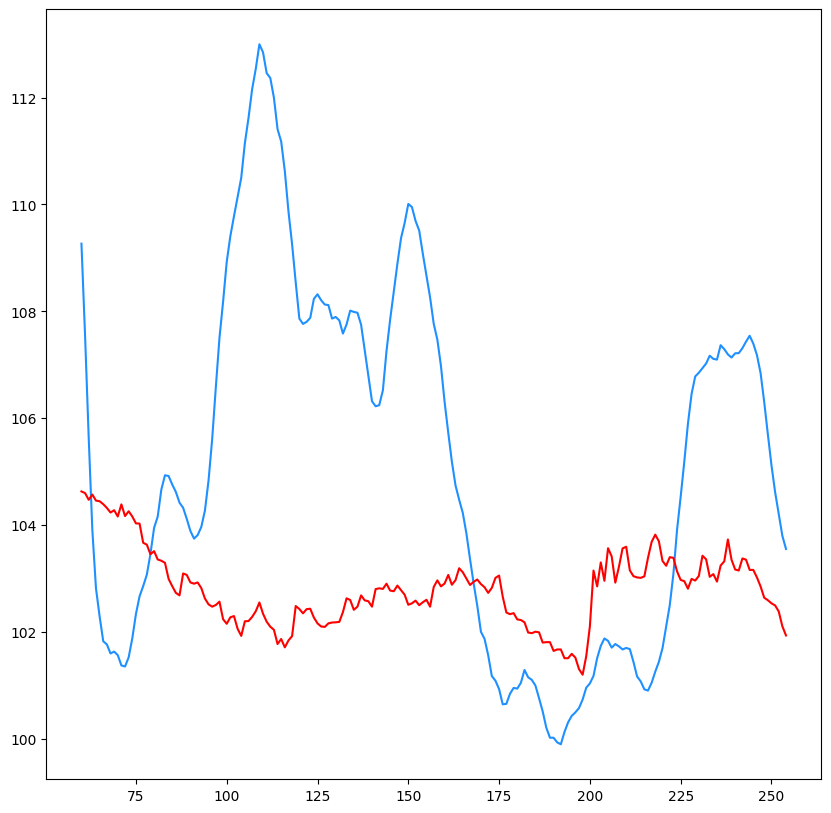

In [ ]:
import matplotlib.pyplot as plt
f,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,10))
plt.plot(df.Forecast_9[60:]*160,color='dodgerblue')

plt.plot(df.True_9[60:],color='red')

In [ ]:
FeatureGat=[]
TemporalGat=[]

with torch.no_grad():
  for batch in tqdm(test_dl):
    x = batch[0].to(device).float()
    #y = batch[1].to(device).float()

    #y_hat, _ =model(x)
    FeatureGat.append(model.feature_gat.forward(x))
    TemporalGat.append(model.temporal_gat.forward(x))
    #recon_x = torch.cat((x[:,1:,:],y),dim=1)
    #_, window_recon = model(recon_x)
    #print(window_recon[:,-1,:].detach().cpu().numpy().shape, y_hat.detach().cpu().numpy().shape)
    #preds.append(y_hat.detach().cpu().numpy())
    #preds=np.append(preds,y_hat.detach().cpu().numpy())

    #preds = np.concatenate((preds, y_hat.detach().cpu().numpy()),axis=0)
    # Extract last reconstruction only
    #recons.append(window_recon[:,-1,:].detach().cpu().numpy())
    #recons=np.append(recons,window_recon[:,-1,:].detach().cpu().numpy())
    #recons = np.concatenate((recons,window_recon[:,-1,:].detach().cpu().numpy()),axis=0)
    #print(preds,recons)
  #preds = np.concatenate(preds, axis=0)
  #recons = np.concatenate(recons,axis=0)

  0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#model.feature_gat.a.shape
model.temporal_gat.a.shape

torch.Size([120, 1])

In [ ]:
len(test_dl)

4

In [ ]:
FeatureGat[1][36]

tensor([[0.6164, 0.6551, 0.6280, 0.6164, 0.6550, 0.6164, 0.6236, 0.6555, 0.6164,
         0.6164],
        [0.6164, 0.6549, 0.6279, 0.6164, 0.6547, 0.6164, 0.6236, 0.6552, 0.6164,
         0.6164],
        [0.6170, 0.6554, 0.6285, 0.6170, 0.6552, 0.6170, 0.6241, 0.6558, 0.6170,
         0.6170],
        [0.6155, 0.6539, 0.6270, 0.6155, 0.6537, 0.6155, 0.6226, 0.6543, 0.6155,
         0.6155],
        [0.6168, 0.6553, 0.6283, 0.6168, 0.6551, 0.6168, 0.6239, 0.6557, 0.6168,
         0.6168],
        [0.6161, 0.6548, 0.6276, 0.6161, 0.6546, 0.6161, 0.6233, 0.6552, 0.6161,
         0.6161],
        [0.6166, 0.6553, 0.6281, 0.6166, 0.6551, 0.6166, 0.6237, 0.6557, 0.6166,
         0.6166],
        [0.6172, 0.6559, 0.6287, 0.6172, 0.6558, 0.6172, 0.6243, 0.6563, 0.6172,
         0.6172],
        [0.6140, 0.6536, 0.6260, 0.6140, 0.6535, 0.6140, 0.6214, 0.6540, 0.6140,
         0.6140],
        [0.6130, 0.6527, 0.6250, 0.6130, 0.6526, 0.6130, 0.6204, 0.6531, 0.6130,
         0.6130],
        [0

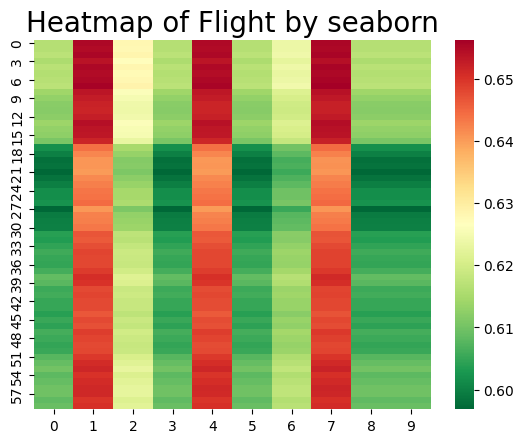

In [ ]:
ax = sns.heatmap(FeatureGat[1][36], cmap='RdYlGn_r')
#plt.title('Heatmap of Flight by seaborn', fontsize=20)
plt.show()


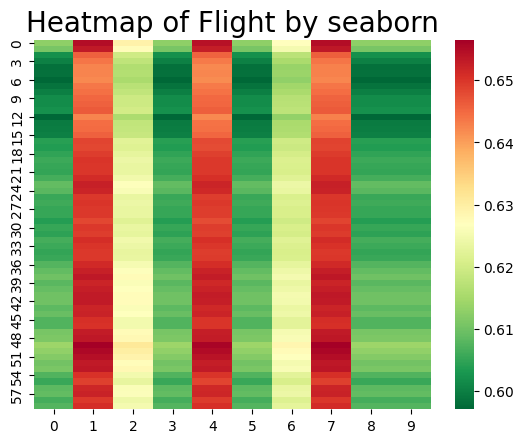

In [ ]:
ax = sns.heatmap(FeatureGat[1][51], cmap='RdYlGn_r')
#plt.title('Heatmap of Flight by seaborn', fontsize=20)
plt.show()

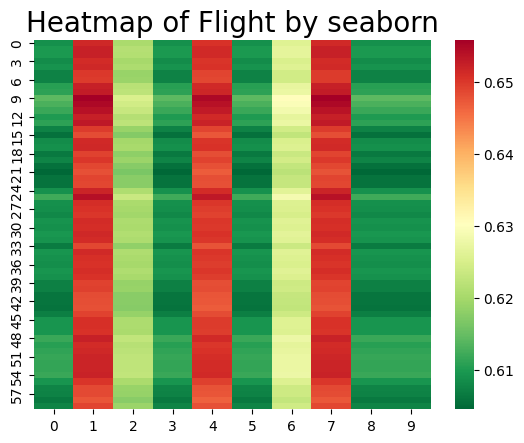

In [ ]:
ax = sns.heatmap(FeatureGat[2][27], cmap='RdYlGn_r') #155
#plt.title('Heatmap of Flight by seaborn', fontsize=20)
plt.show()

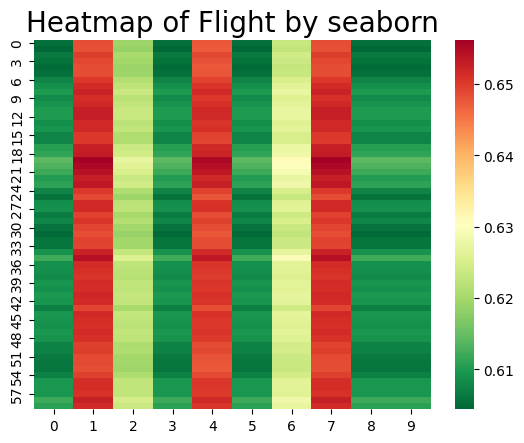

In [ ]:
ax = sns.heatmap(FeatureGat[2][17], cmap='RdYlGn_r') #145
#plt.title('Heatmap of Flight by seaborn', fontsize=20)
plt.show()

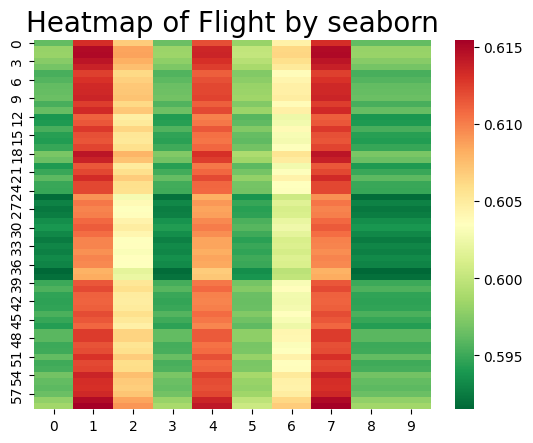

In [ ]:
ax = sns.heatmap(FeatureGat[3][27], cmap='RdYlGn_r') #220
#plt.title('Heatmap of Flight by seaborn', fontsize=20)
plt.show()

In [ ]:
TemporalGat[0][0]

tensor([[0.6939, 0.5029, 0.6413, 0.6358, 0.5009, 0.7086, 0.6481, 0.5001, 0.6739,
         0.7249],
        [0.6939, 0.5029, 0.6413, 0.6358, 0.5009, 0.7086, 0.6481, 0.5001, 0.6739,
         0.7249],
        [0.6939, 0.5029, 0.6413, 0.6358, 0.5009, 0.7086, 0.6481, 0.5001, 0.6739,
         0.7249],
        [0.6939, 0.5029, 0.6413, 0.6358, 0.5009, 0.7086, 0.6481, 0.5001, 0.6739,
         0.7249],
        [0.6939, 0.5029, 0.6413, 0.6358, 0.5009, 0.7086, 0.6481, 0.5001, 0.6739,
         0.7249],
        [0.6939, 0.5029, 0.6413, 0.6358, 0.5009, 0.7086, 0.6481, 0.5001, 0.6739,
         0.7249],
        [0.6939, 0.5029, 0.6413, 0.6358, 0.5009, 0.7086, 0.6481, 0.5001, 0.6739,
         0.7249],
        [0.6939, 0.5029, 0.6413, 0.6358, 0.5009, 0.7086, 0.6481, 0.5001, 0.6739,
         0.7249],
        [0.6939, 0.5029, 0.6413, 0.6358, 0.5009, 0.7086, 0.6481, 0.5001, 0.6739,
         0.7249],
        [0.6939, 0.5029, 0.6413, 0.6358, 0.5009, 0.7086, 0.6481, 0.5001, 0.6739,
         0.7249],
        [0